In [6]:
#importing datasets
df = sns.load_dataset('iris')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


The Iris dataset contains 150 observations of three different species, Iris setosa, Iris virginica, and I. versicolor, with 50 observations each. Each observation consists of four attributes: sepal length, sepal width, petal length, and petal width.

In [18]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [7]:
encoder = LabelEncoder()#in the output column applying label encoder to convert it into numbers
df['species'] = encoder.fit_transform(df['species'])

In [8]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [31]:
#lets only select only 3 columns outof 5 columns
df = df[['sepal_length','petal_length','species']]

In [32]:
df.head(5)

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [33]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [35]:
#Clf is an estimator instance, which is used to store model
#below multinominal is the technical term for softmax regression in sklearn
clf = LogisticRegression(multi_class='multinomial')

In [36]:
clf.fit(X_train,Y_train)

LogisticRegression(multi_class='multinomial')

In [39]:
y_pred=clf.predict(X_test)

In [40]:
accuracy_score(y_pred,Y_test)

0.9666666666666667

In [41]:
pd.DataFrame(confusion_matrix(y_pred,Y_test))

,0,1,2
0,14,0,0
1,0,7,0
2,0,1,8


In [49]:
sepal_length = float(input("Enter the sepal length :"))
petal_length = float(input("Enter the petal length :"))
query = np.array([[sepal_length,petal_length]])
clf.predict_proba(query)

Enter the sepal length :3.1
Enter the petal length :2.1


/Users/parajulitilak/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.36256549e-01, 6.37307640e-02, 1.26868233e-05]])

In [51]:
'''
    The Iris dataset contains 150 observations of three different species, Iris setosa, 
    Iris virginica, and I. versicolor, with 50 observations each. Each observation consists
    of four attributes: sepal length, sepal width, petal length, and petal width.
'''
'''
    1.first array index is the probability that the flower is setosa
    2.second array index is the probability that the flower is versicolor
    3.third array index is the probability that the flower is virginica
'''

#and if we add these three numbers we will get 1.

'\n    1.first array index is the probability that the flower is setosa\n    2.second array index is the probability that the flower is versicolor\n    3.third array index is the probability that the flower is virginica\n'

In [52]:
clf.predict(query) #we get max from the above three indexes here.

/Users/parajulitilak/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

/Users/parajulitilak/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


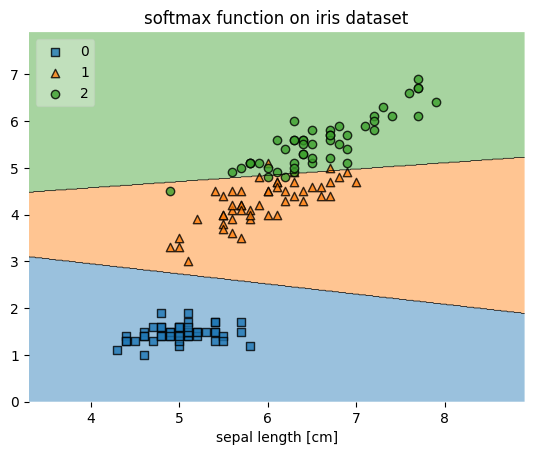

In [60]:
#pip install mlxtend
from mlxtend.plotting import plot_decision_regions
#axis annotation
plot_decision_regions(X.values, Y.values,clf,legend=2)
plt.xlabel('petal length [cm]')
plt.xlabel('sepal length [cm]')
plt.title('softmax function on iris dataset')
plt.show()